In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display


def print_summary(df):
    display(df.info())
    display(df.head())

Creación del Dataframe y exploración preliminar

In [21]:
df = pd.read_csv('../data/raw/train.csv')
print_summary(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

None

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


Datos Faltantes

In [3]:
df.isnull().sum()
# sns.heatmap(df.isnull(), cbar=False)

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


Separación de variables numéricas de las categóricas

In [4]:
df.iloc[:, :11].head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,1,2596,51,3,258,0,510,221,232,148,6279
1,2,2590,56,2,212,-6,390,220,235,151,6225
2,3,2804,139,9,268,65,3180,234,238,135,6121
3,4,2785,155,18,242,118,3090,238,238,122,6211
4,5,2595,45,2,153,-1,391,220,234,150,6172


In [5]:
numeric_variables = df.iloc[:, 1:11].columns.to_list()
numeric_variables

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

In [6]:
categorical_variables = [var for var in df.columns[1:-1] if var not in numeric_variables]
categorical_variables

['Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

Reverse One-Hot-Encoding de variables categóricas sólo para propósito de visualización y análisis

In [7]:
df['Wilderness_Area'] = df.filter(like='Wilderness_Area').idxmax(axis=1)
df['Soil_Type'] = df.filter(like='Soil_Type').idxmax(axis=1)

In [8]:
df['Wilderness_Area'] = df['Wilderness_Area'].str.replace('Wilderness_Area', '', regex=False).astype(int)
df['Soil_Type'] = df['Soil_Type'].str.replace('Soil_Type', '', regex=False).astype(int)

Distribución de variables numéricas:

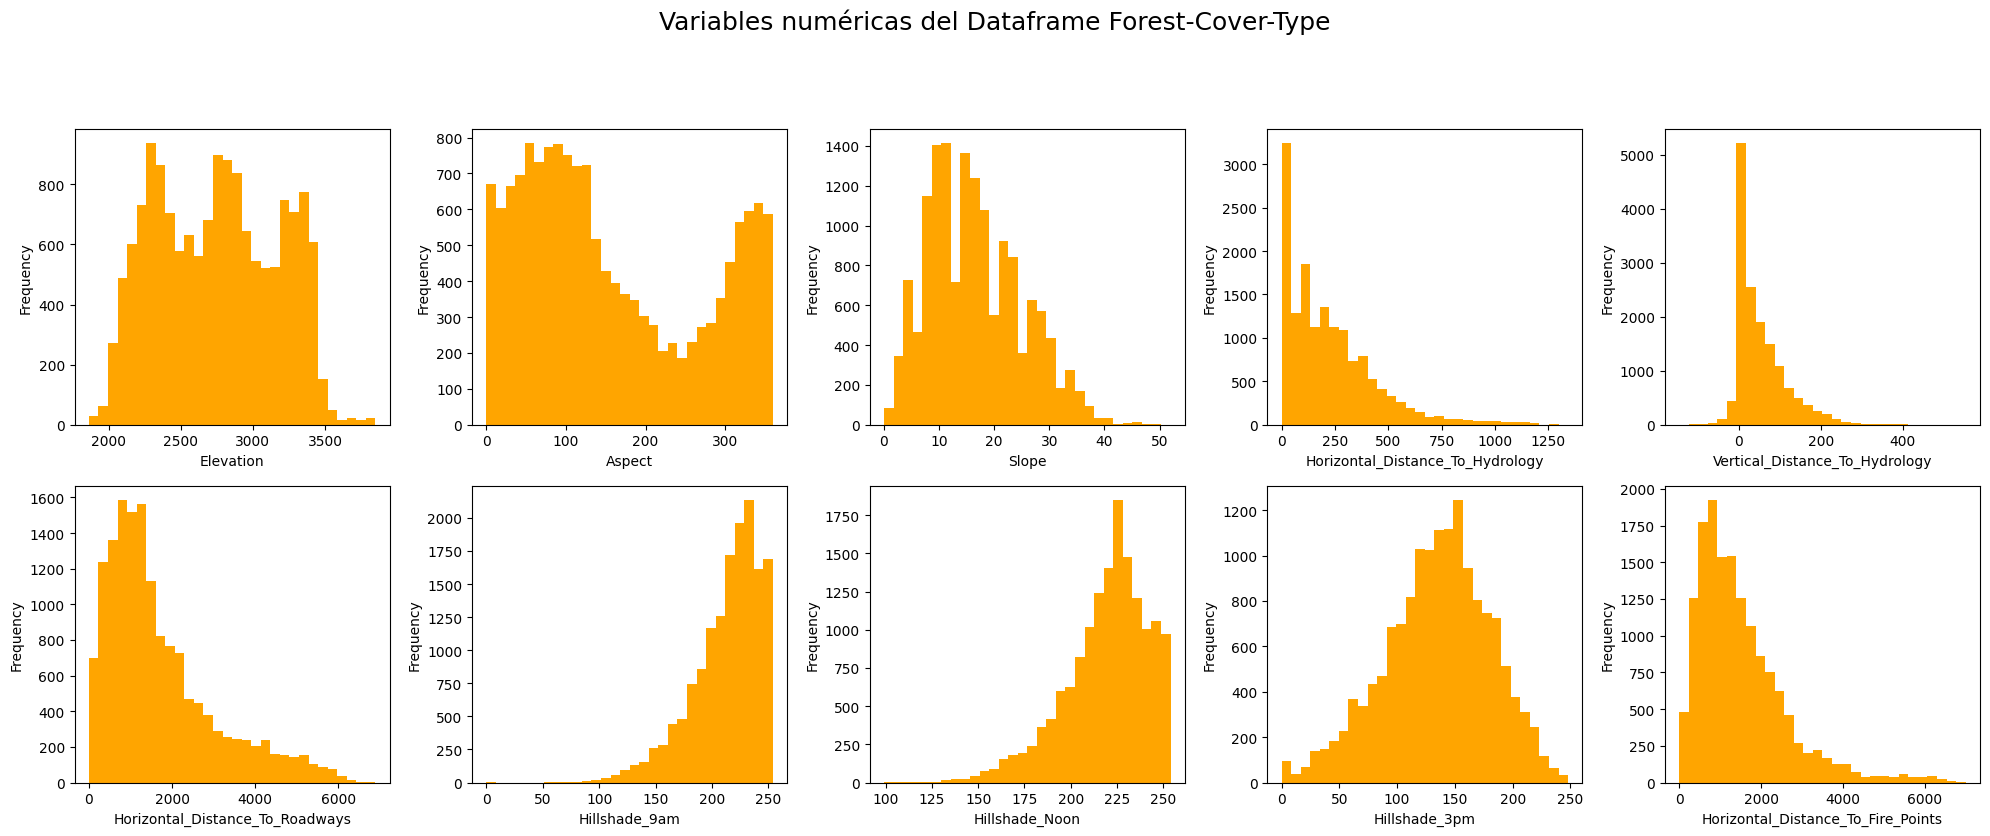

In [9]:
fig, ax = plt.subplots(figsize = (20,8), ncols=5, nrows=2)

fig.suptitle('Variables numéricas del Dataframe Forest-Cover-Type', fontsize=18, y = 1.04)

num_bins = 30

for i, var in enumerate(numeric_variables):
    row, col = divmod(i, 5)  # Calculate row and column indices
    df[var].plot.hist(bins=num_bins, x=var, ax=ax[row][col], color='orange')
    
    # Set x and y labels
    ax[row][col].set_xlabel(var)
    ax[row][col].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make space for the title
plt.show()

Distribución de variables categóricas:

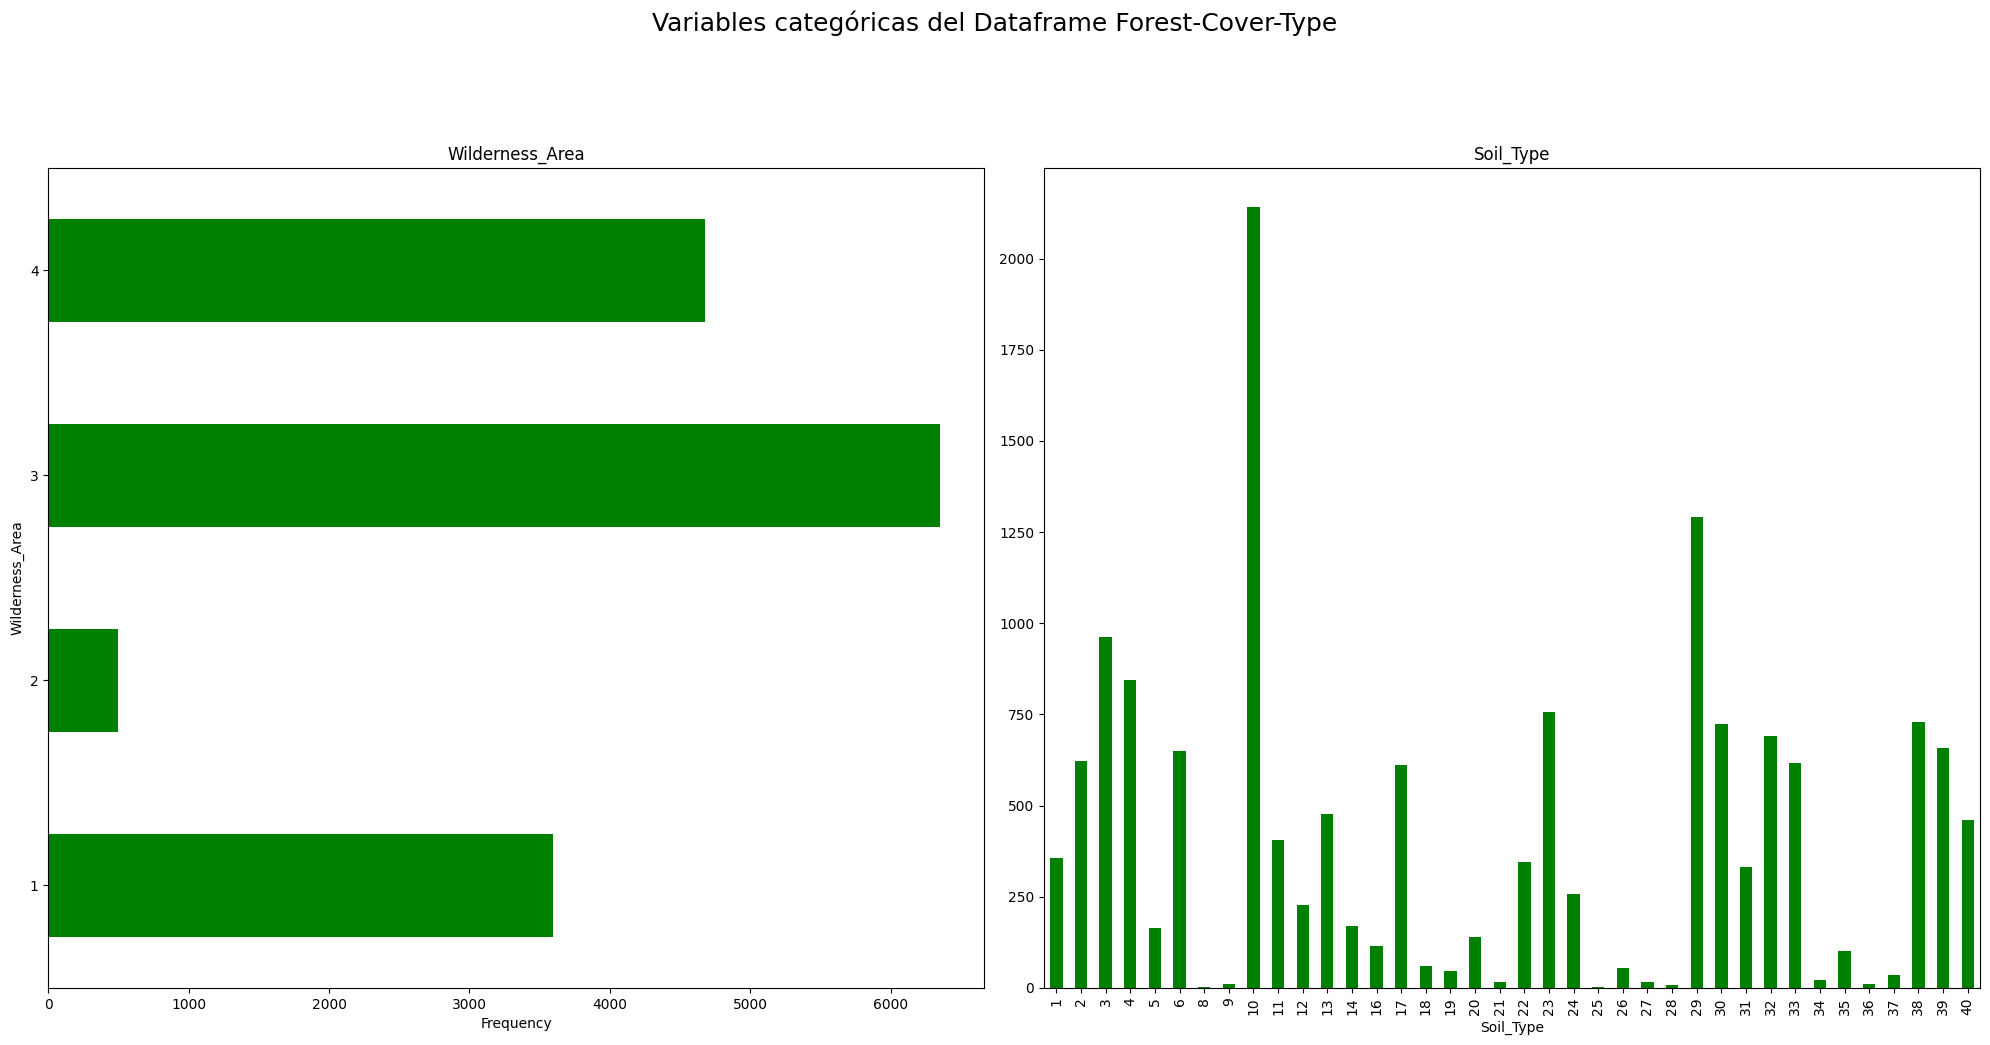

In [10]:
fig, ax = plt.subplots(figsize = (20,10), ncols=2)

fig.suptitle('Variables categóricas del Dataframe Forest-Cover-Type', fontsize=18, y = 1.04)

sorted_Wilderness_Area_value_counts = df.Wilderness_Area.value_counts().sort_index()
sorted_Soil_Type_value_counts = df.Soil_Type.value_counts().sort_index()

sorted_Wilderness_Area_value_counts.plot.barh(title = 'Wilderness_Area', ax=ax[0], xlabel='Frequency', color = 'green')
sorted_Soil_Type_value_counts.plot.bar(title = 'Soil_Type', ax=ax[1], color = 'green')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make space for the title
plt.show()

Relación con la Variable Target

In [11]:
variables = numeric_variables + ['Wilderness_Area', 'Soil_Type']

len(variables)

12

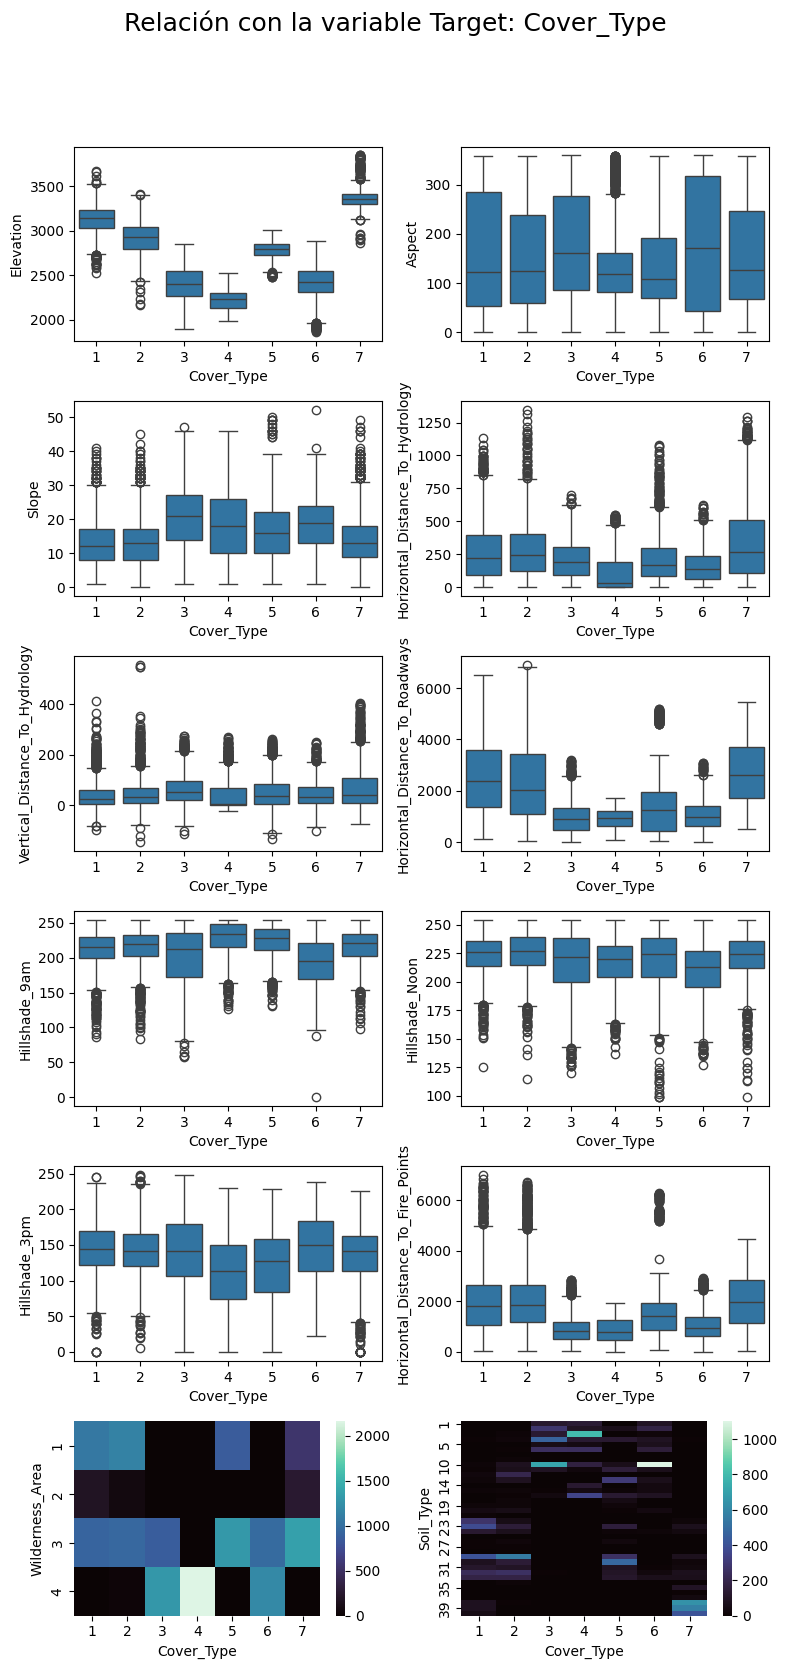

In [12]:
fig, ax = plt.subplots(figsize = (8,16), ncols=2, nrows=6)

fig.suptitle('Relación con la variable Target: Cover_Type', fontsize=18, y = 1.04)

for i, var in enumerate(variables):
    row, col = divmod(i, 2)  # Calculate row and column indices
    if var in numeric_variables:
        # df.plot.scatter(x=var, y='Cover_Type', ax=ax[row][col], c="magenta")
        sns.boxplot(x='Cover_Type', y=var, data=df, ax=ax[row][col])
    else:
        contingency_table = pd.crosstab(df[var], df['Cover_Type'])
        sns.heatmap(contingency_table, ax=ax[row][col], cmap='mako')

plt.tight_layout(rect=[0, 0, 1, 0.99])  # Adjust layout to make space for the title
plt.show()   

Gráfico de correlación de variables numericas:

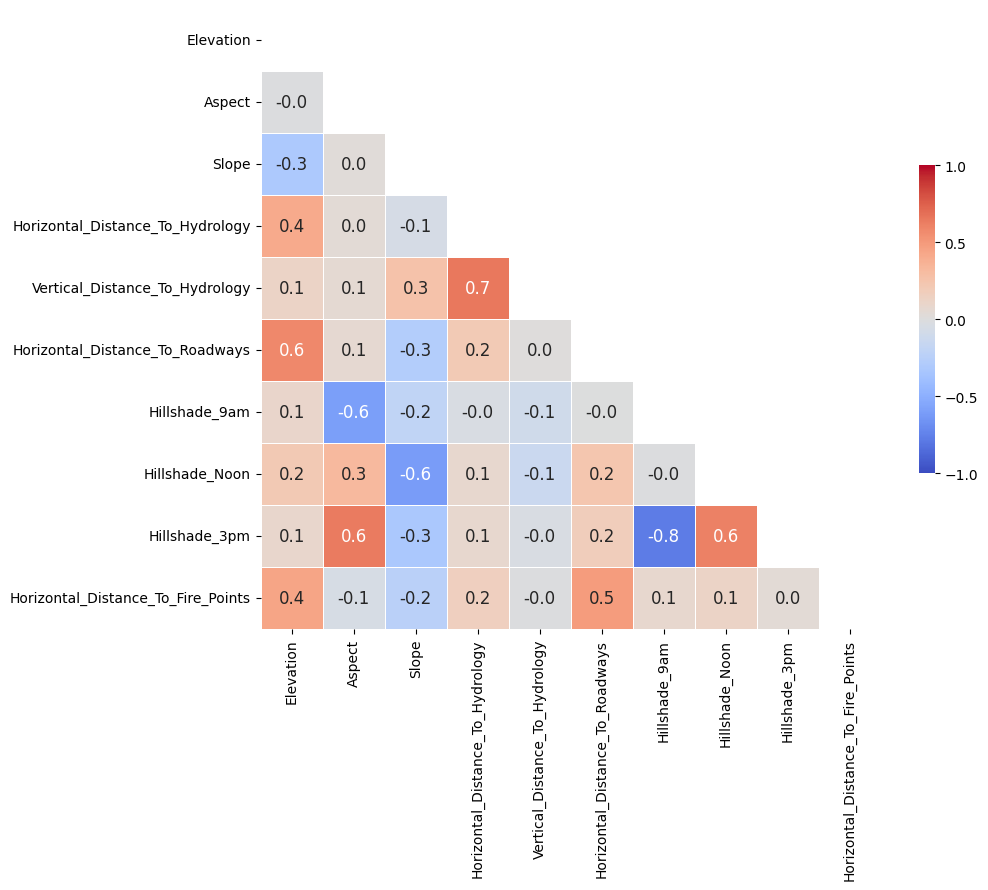

In [13]:
# Obtenemos las variables numericas y generamos la matriz de correlacion
correlation_matrix = df[numeric_variables].corr()

# Graficamos la correlacion entre las variables
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(10, 10))

heatmap = sns.heatmap(correlation_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks': [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True, annot_kws={"fontsize":12},
                      fmt='.1f')


ax.set_yticklabels(correlation_matrix.columns, rotation = 0)
ax.set_xticklabels(correlation_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

<Figure size 640x480 with 0 Axes>

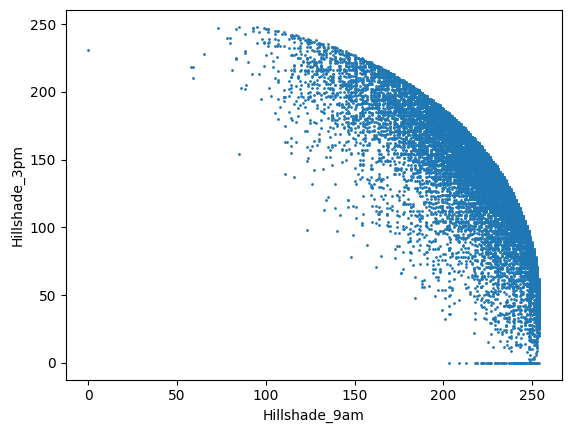

In [14]:
plt.figure()
df.plot.scatter(x='Hillshade_9am', y='Hillshade_3pm', s=1)
plt.show()

<Figure size 640x480 with 0 Axes>

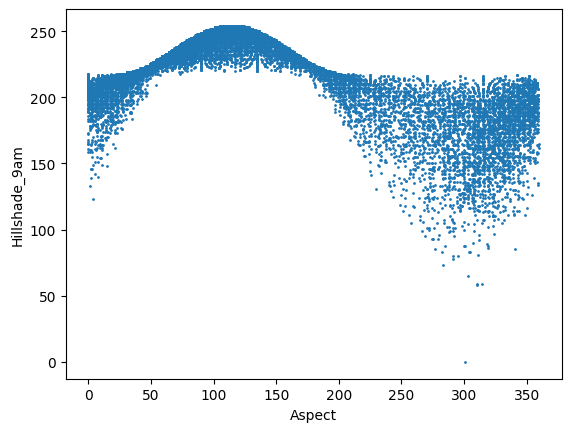

In [15]:
plt.figure()
df.plot.scatter(x='Aspect', y='Hillshade_9am', s=1)
plt.show()

<Figure size 640x480 with 0 Axes>

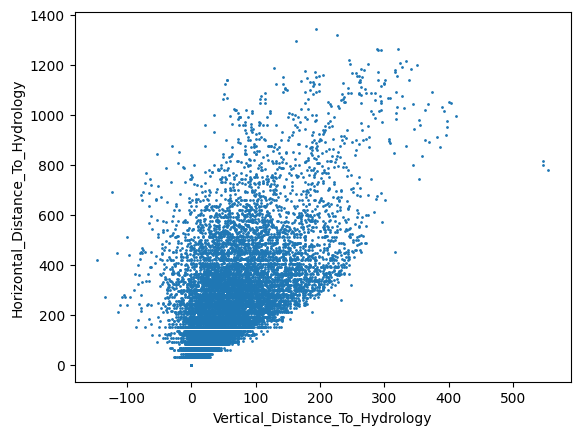

In [16]:
plt.figure()
df.plot.scatter(x='Vertical_Distance_To_Hydrology', y='Horizontal_Distance_To_Hydrology', s=1)
plt.show()

Chequeamos el balance de clases en Cover_Type

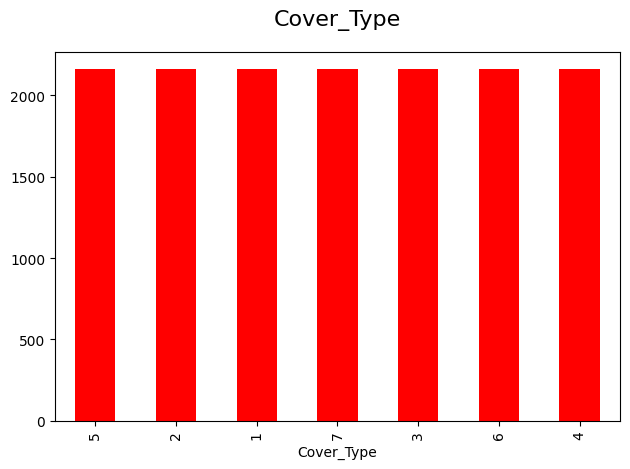

In [18]:
plt.figure()

df.Cover_Type.value_counts().plot.bar(title='Cover_Type', color='red')

plt.title('Cover_Type', fontsize=16, y=1.05)  # Ajusta el valor de `y` para mayor espacio
plt.tight_layout()
plt.show()